In [1]:
from matplotlib import pyplot as plt
import numpy as np

import math
import statistics
import os
from pathlib import Path

In [8]:
! ls ../Outputs/streaming_outputs/output-7/


output_100_100_0.1.txt output_100_100_0.8.txt output_800_500_0.4.txt
output_100_100_0.2.txt output_100_100_0.9.txt output_800_500_0.5.txt
output_100_100_0.3.txt output_1257_43_0.6.txt output_800_500_0.6.txt
output_100_100_0.4.txt output_1277_23_0.5.txt output_800_500_0.7.txt
output_100_100_0.5.txt output_800_500_0.1.txt output_800_500_0.8.txt
output_100_100_0.6.txt output_800_500_0.2.txt output_800_500_0.9.txt
output_100_100_0.7.txt output_800_500_0.3.txt output_955_345_0.7.txt


In [21]:
paths_list = [Path("./../Outputs/guru_outputs"), Path("./../Outputs/output200"), Path("./../Outputs/output1300"), Path("./../Outputs/streaming_outputs/output-7")]


In [28]:
r_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
files_dict = {r_value:[] for r_value in r_values}
values_dict = {r_value:[] for r_value in r_values}
files_dict

{0.1: [],
 0.2: [],
 0.3: [],
 0.4: [],
 0.5: [],
 0.6: [],
 0.7: [],
 0.8: [],
 0.9: []}

In [29]:

for r_value in r_values:
    for path in paths_list:
        files_dict[r_value].extend([file for file in path.glob(f"*{r_value}*.txt")])
        values_list = []
        for file in files_dict[r_value]:
            with open(file) as input_file:
                for line in input_file:
                    values_list.append(float(line.strip()))
        values_dict[r_value] = values_list
            
print(f"{files_dict}")

{0.1: [PosixPath('../Outputs/guru_outputs/0.1_output.txt'), PosixPath('../Outputs/output200/0.1_output.txt'), PosixPath('../Outputs/output1300/0.1_output.txt'), PosixPath('../Outputs/streaming_outputs/output-7/output_800_500_0.1.txt'), PosixPath('../Outputs/streaming_outputs/output-7/output_100_100_0.1.txt')], 0.2: [PosixPath('../Outputs/guru_outputs/0.2_output.txt'), PosixPath('../Outputs/output200/0.2_output.txt'), PosixPath('../Outputs/output1300/0.2_output.txt'), PosixPath('../Outputs/streaming_outputs/output-7/output_800_500_0.2.txt'), PosixPath('../Outputs/streaming_outputs/output-7/output_100_100_0.2.txt')], 0.3: [PosixPath('../Outputs/guru_outputs/0.3_output.txt'), PosixPath('../Outputs/output200/0.3_output.txt'), PosixPath('../Outputs/output1300/0.3_output.txt'), PosixPath('../Outputs/streaming_outputs/output-7/output_800_500_0.3.txt'), PosixPath('../Outputs/streaming_outputs/output-7/output_100_100_0.3.txt')], 0.4: [PosixPath('../Outputs/guru_outputs/0.4_output.txt'), PosixPa

In [32]:
[len(values_dict[r_value]) for r_value in r_values]

[1081, 1100, 1100, 1100, 1099, 1099, 847, 1100, 1100]

In [41]:
mean_dict = {r_value:[] for r_value in r_values}
std_deviation_dict = {r_value:[] for r_value in r_values}

for r_value, scores_list in values_dict.items():
    mean_dict[r_value] = statistics.mean(scores_list)
    std_deviation_dict[r_value] = statistics.stdev(scores_list)
    print(f"r:{r_value}: Mean: {round(statistics.mean(scores_list), 4)}") # || Std_deviation:{statistics.stdev(scores_list)}")

r:0.1: Mean: 0.4381
r:0.2: Mean: 0.5511
r:0.3: Mean: 0.6578
r:0.4: Mean: 0.7461
r:0.5: Mean: 0.8191
r:0.6: Mean: 0.8915
r:0.7: Mean: 0.9459
r:0.8: Mean: 0.9674
r:0.9: Mean: 0.9822


In [53]:
for i in list(mean_dict.values())[::-1]:
    print(round(i, 4))

0.9822
0.9674
0.9459
0.8915
0.8191
0.7461
0.6578
0.5511
0.4381


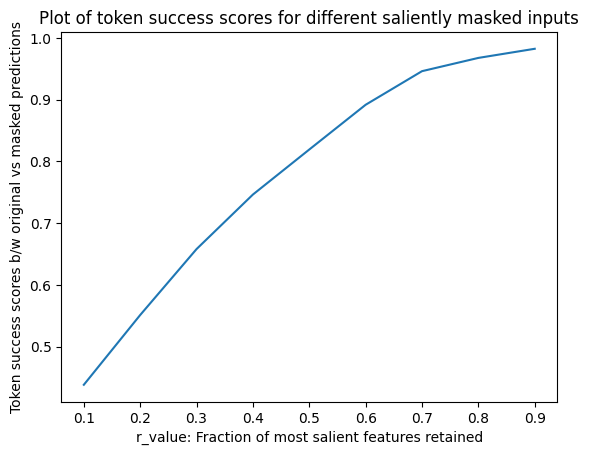

In [47]:
plt.cla()
plt.plot(r_values, mean_dict.values()) # .flip() reverses the order of the rows, so that, in the visualization, lower pitches appear lower on the y-axis
plt.title("Plot of token success scores for different saliently masked inputs")
plt.xlabel("r_value: Fraction of most salient features retained")
plt.ylabel("Token success scores b/w original vs masked predictions")
plt.savefig("results.png")